编写实现灰度图像形态学：腐蚀、膨胀、开、闭，这四种基本运算的函数。要求待处理灰度图像和形
态学结构元作为函数的输入参数，输出为处理后的结果图像 

In [51]:
#!/usr/bin/python3 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [52]:
def grayscale_erode_one_time(image, structuring_element):
    """
    灰度腐蚀操作 一次
    :param image: 输入灰度图像，类型为numpy数组
    :param structuring_element: 结构元，类型为numpy数组
    :return: 腐蚀后的灰度图像
    """
    se_center = (structuring_element.shape[0] // 2, structuring_element.shape[1] // 2)
    padded_image = np.pad(image, ((se_center[0],), (se_center[1],)), mode='edge')
    eroded_image = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + structuring_element.shape[0], j:j + structuring_element.shape[1]]
            eroded_image[i, j] = np.min(region - structuring_element) #生成版本
            # FIXME: 以下是错误的代码 could not work 没想明白(+_+)?
            # region_flap = region.flatten() 
            # se_flap = structuring_element.flatten()
            # for i in range(len(se_flap)):
            #     if se_flap[i] == 0:
            #         region_flap[i] = 255
            # eroded_image[i, j] = np.min(region_flap)
    
    return eroded_image

def grayscale_erode(image, structuring_element, times = 1):
    """
    灰度腐蚀操作
    :param image: 输入灰度图像，类型为numpy数组
    :param structuring_element: 结构元，类型为numpy数组
    :param times: 腐蚀次数
    :return: 腐蚀后的灰度图像
    """
    for i in range(times):
        image = grayscale_erode_one_time(image, structuring_element)
    return image

def grayscale_dilate_one_time(image, structuring_element):
    """
    灰度膨胀操作 一次
    :param image: 输入灰度图像，类型为numpy数组
    :param structuring_element: 结构元，类型为numpy数组
    :return: 膨胀后的灰度图像
    """
    se_center = (structuring_element.shape[0] // 2, structuring_element.shape[1] // 2)
    padded_image = np.pad(image, ((se_center[0],), (se_center[1],)), mode='edge')
    dilated_image = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + structuring_element.shape[0], j:j + structuring_element.shape[1]]
            dilated_image[i, j] = np.max(region + structuring_element) 
            # FIXME: 以下是错误的代码 could not work, 没想明白(+_+)?
            # region_flap = region.flatten()
            # se_flap = structuring_element.flatten()
            # for i in range(len(se_flap)):
            #     if se_flap[i] == 0:
            #         region_flap[i] = 0
            # dilated_image[i, j] = np.max(region_flap)

    return dilated_image

def grayscale_dilate(image, structuring_element, times = 1):
    """
    灰度膨胀操作
    :param image: 输入灰度图像，类型为numpy数组
    :param structuring_element: 结构元，类型为numpy数组
    :param times: 膨胀次数
    :return: 膨胀后的灰度图像
    """
    for i in range(times):
        image = grayscale_dilate_one_time(image, structuring_element)
    return image

def grayscale_open(image, structuring_element, times = 1):
    """
    灰度开运算
    :param image: 输入灰度图像，类型为numpy数组
    :param structuring_element: 结构元，类型为numpy数组
    :return: 开运算后的灰度图像
    """
    eroded = grayscale_erode(image, structuring_element, times)
    opened_image = grayscale_dilate(eroded, structuring_element, times)
    return opened_image

def grayscale_close(image, structuring_element, times = 1):
    """
    灰度闭运算
    :param image: 输入灰度图像，类型为numpy数组
    :param structuring_element: 结构元，类型为numpy数组
    :return: 闭运算后的灰度图像
    """
    dilated = grayscale_dilate(image, structuring_element, times)
    closed_image = grayscale_erode(dilated, structuring_element, times)
    return closed_image


In [53]:
# 测试
root_path = '/root/DIVP_project/'
image_path_rice = "project03/images/rice_image_with_intensity_gradient.tif"
image_path_wood = "project03/images/wood_dowels.tif"
image_path_xray = "project03/images/cygnusloop_Xray_original.tif"

In [54]:
image_rice = Image.open(root_path + image_path_rice)
image_wood = Image.open(root_path + image_path_wood)
image_xray = Image.open(root_path + image_path_xray)

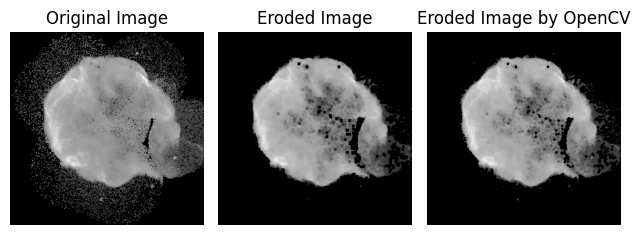

In [55]:
# 对xray 图像进行灰度腐蚀操作，并与opencv的结果进行对比
image_xray = image_xray.convert('L')
image_xray = np.array(image_xray)
structuring_element = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]).astype(np.uint8)
eroded_image = grayscale_erode(image_xray, structuring_element, 3)
eroded_image_cv = cv2.erode(image_xray, structuring_element, iterations=3)
plt.figure()
# 原图与腐蚀后的图像对比
plt.subplot(1, 3, 1)
plt.imshow(image_xray, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(eroded_image_cv, cmap='gray')
plt.title('Eroded Image by OpenCV')
plt.axis('off')
plt.tight_layout()
plt.show()


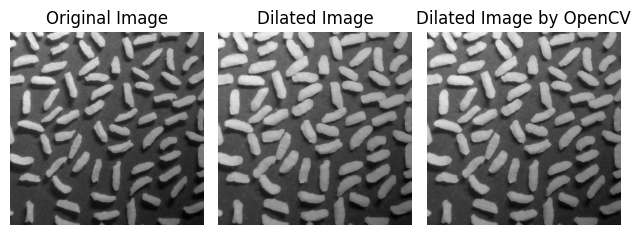

In [56]:
# 对rice 图像进行灰度膨胀操作，并与opencv的结果进行对比
image_rice = image_rice.convert('L')
image_rice = np.array(image_rice)
structuring_element = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]).astype(np.uint8)
dilated_image = grayscale_dilate(image_rice, structuring_element, 3)
dilated_image_cv = cv2.dilate(image_rice, structuring_element, iterations=3)
plt.figure()
# 原图与膨胀后的图像对比
plt.subplot(1, 3, 1)
plt.imshow(image_rice, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(dilated_image_cv, cmap='gray')
plt.title('Dilated Image by OpenCV')
plt.axis('off')
plt.tight_layout()
plt.show()

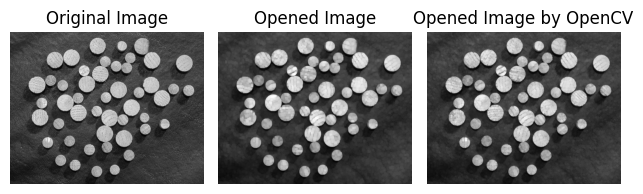

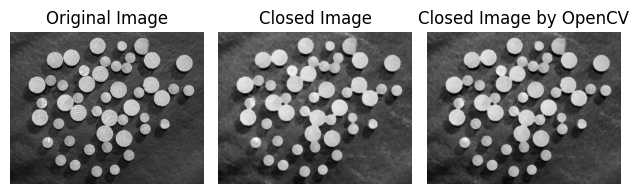

In [57]:
# 对 wood 图像进行灰度开运算，并与opencv的结果进行对比
image_wood = image_wood.convert('L')
image_wood = np.array(image_wood)
structuring_element = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]).astype(np.uint8)
opened_image = grayscale_open(image_wood, structuring_element, 3)
opened_image_cv = cv2.morphologyEx(image_wood, cv2.MORPH_OPEN, structuring_element, iterations=3)
plt.figure()
# 原图与开运算后的图像对比
plt.subplot(1, 3, 1)
plt.imshow(image_wood, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(opened_image_cv, cmap='gray')
plt.title('Opened Image by OpenCV')
plt.axis('off')
plt.tight_layout()
plt.show()

# 对 wood 图像进行灰度闭运算，并与opencv的结果进行对比
image_wood = np.array(image_wood)
structuring_element = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]).astype(np.uint8)
closed_image = grayscale_close(image_wood, structuring_element, 3)
closed_image_cv = cv2.morphologyEx(image_wood, cv2.MORPH_CLOSE, structuring_element, iterations=3)
plt.figure()
# 原图与闭运算后的图像对比
plt.subplot(1, 3, 1)
plt.imshow(image_wood, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(closed_image_cv, cmap='gray')
plt.title('Closed Image by OpenCV')
plt.axis('off')
plt.tight_layout()
plt.show()
